In [58]:
import gym
import matplotlib.pyplot as plt
from gym.wrappers import RecordVideo
from gym import spaces
import json

In [ ]:
class GardenEnv(gym.Env):
    def __init__(self, box_size, crop_data):
        super().__init__()
        self.t = 0
        self.box_size = box_size
        self.crop_data = crop_data
        self.actions = ['plant', 'water', 'abstain', 'notify']
        
        with open('../data/render_colors.json') as json_file:
            colors = json.load(json_file)
        self.colors = colors
        
    def step(self, action):
        self.t += 1
        """ Takes a step with given action and returns the resulting environment.
        Args:
            action: int 
            
        Returns:
            env: state_dict: {
                    plant1: [type, location, radius, water_status],
                    plant2: [type, location, radius, water_status],
                    ...
                }
        """
        return env
    
    def reset(self):
        self.t = 0
        return 0
    
    def render(self, mode='human', state):
        if (mode=='human'):
            human_render(state)
        else:
            return machine_render(state)
            
    def human_render(self, state):
        fig, ax = plt.subplots()
        ax.set_xlim = self.box_size[0]
        ax.set_ylim = self.box_size[1]
        for plant in state.keys():
            ax.add_patch(plt.Circle(state[k][1], radius=state[k][2], color=self.colors[state[k][0]]))
        fig.savefig(f'env_at_time_{self.t}.png')
    
    def machine_render(self, state):
        return 0
            

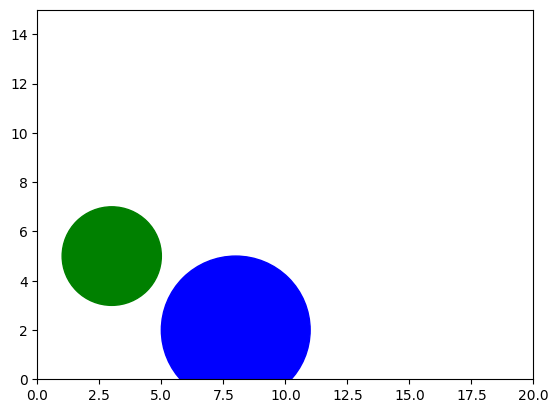

In [57]:
state = {
    'plant1': ["radish", (3, 5), 2, 10],
    'plant2': ["bok_choy", (8, 2), 3, 10]
}
colors = {
    "radish": "green",
    "bok_choy": "blue"
    }
fig, ax = plt.subplots()
for k in state.keys():
    ax.add_patch(plt.Circle(state[k][1], radius=state[k][2], color=colors[state[k][0]]))


ax.set_xlim([0, 20])
ax.set_ylim([0, 15])
# circle1 = plt.Circle((0, 0.25), 0.2, color='green')
# circle2 = plt.Circle((1, 0.5), 0.2, color='blue')

# ax.add_patch(circle1)
# ax.add_patch(circle2)

fig.savefig('firstplot.png')



In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
